In [77]:
!pip install opencv-python

In [78]:
#importing library opencv
import cv2

In [79]:
import matplotlib.pyplot as plt

In [80]:
config_file="frozen_inference_graph.pb"
frozen_model="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [81]:
#model making
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [82]:
classLabels=[] ##empty list of python
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [83]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [84]:
print(len(classLabels))

80


In [85]:
#set up configuration
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ##moilenet-[-1,1
model.setInputSwapRB(True)

< cv2.dnn.Model 0000014A59E2D050>

In [86]:
#we have successfully loaded the model

## read an image

In [88]:
img=cv2.imread('man-bmw-tux.jpeg') #BGR

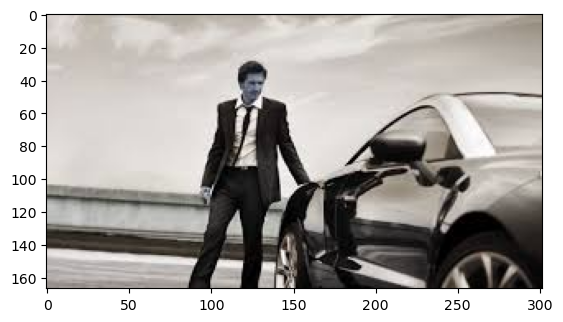

In [89]:
plt.imshow(img)

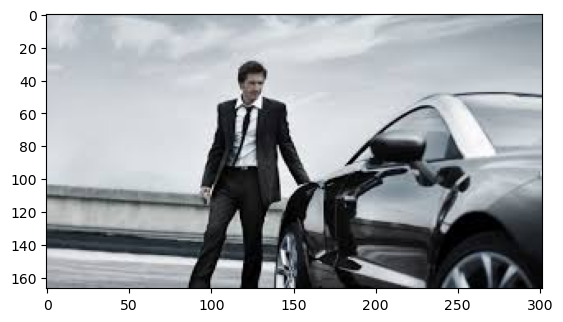

In [90]:
#image converted to RGB to view actual image
#BGR->RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [91]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)


In [92]:
print(ClassIndex)

[3 1]


In [93]:
font_scale = 3
font= cv2.FONT_HERSHEY_PLAIN 
for ClassInd, conf, boxes in zip(ClassIndex, confidece, bbox): 
    #cv2.rectangle(frame, (x, y), (x+w y+h), (255, 0, 0), 2) 
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale= font_scale, color=(0, 0, 0), thickness=1) 
    cv2.rectangle(img, boxes, (250, 0, 0), 2) 
    cv2.putText(img,classLabels [ClassInd-1], (boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,200,0),thickness=3)

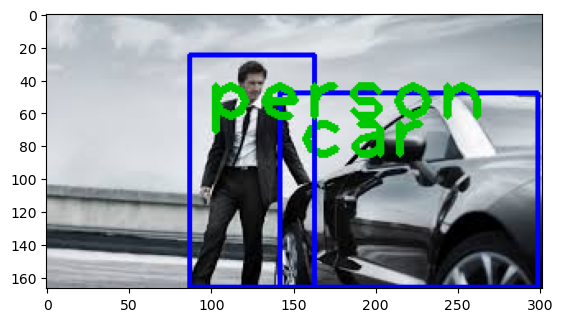

In [94]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))